In [1]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
#Leemos el CSV
datos_principales = pd.read_csv('../../train.csv')

In [3]:
datos_principales['excelente'] = 0
datos_principales.loc[datos_principales.descripcion.str.contains('vigilancia', na=False), 'vigilancia'] = 1
datos_principales['vigilancia'] = 0
datos_principales.loc[datos_principales.descripcion.str.contains('excelente', na=False), 'excelente'] = 1
datos_principales['esquina'] = 0
datos_principales.loc[datos_principales.descripcion.str.contains('esquina', na=False), 'esquina'] = 1
datos_principales['remodelada'] = 0
datos_principales.loc[datos_principales.descripcion.str.contains('remodelada', na=False), 'remodelada'] = 1
datos_principales['lujo'] = 0
datos_principales.loc[datos_principales.descripcion.str.contains('lujo', na=False), 'lujo'] = 1

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [5]:
mapa = gpd.read_file('../../mexico/Mexico_Vialidad.shp')

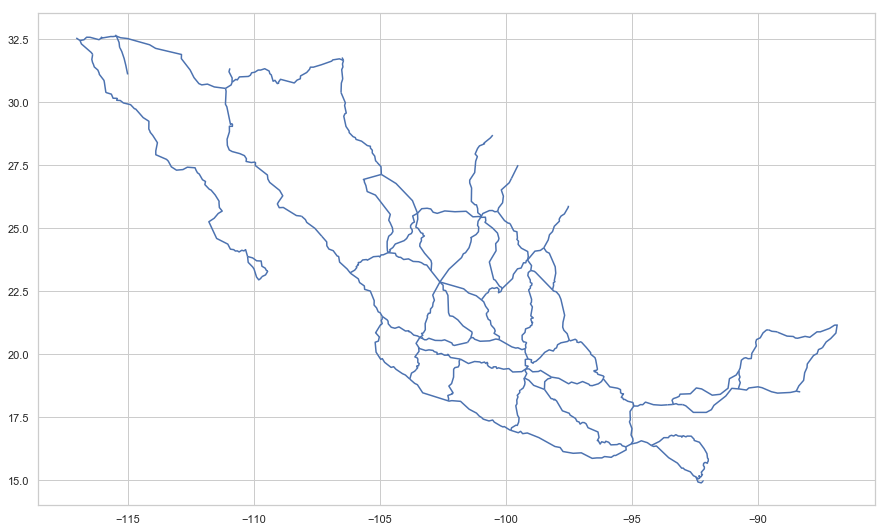

In [6]:
fig,ax = plt.subplots(figsize = (15,15))
mapa.plot(ax = ax)

In [7]:
datos_principales['lat'].fillna(0, inplace=True)
datos_principales['lng'].fillna(0, inplace=True)
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(datos_principales['lng'], datos_principales['lat'])]
geometry[:3]

In [8]:
geo_df = gpd.GeoDataFrame(datos_principales, crs = crs, geometry = geometry)

In [9]:
from urllib2 import urlopen
import json
import requests
import geocoder

In [10]:
def obtenerPais(lat,lng):
    g = geocoder.mapbox(str(lat) +',' + str(lng), method='reverse', key='pk.eyJ1Ijoic2lsdmFobGFyYXZlbCIsImEiOiJjazA4cjZ2enIwMHp4M21wbHN0ZWZ1ODA3In0.DXubxUTjcwyqGzWv2517jA')
    return g.country

In [11]:
mexico = geo_df[(geo_df['lng'] < -85) & (geo_df['lng'] > -120) & (geo_df['lat'] > 12.5) & (geo_df['lat'] < 35)]
NO_mexico = geo_df[((geo_df['lng'] > -85) | (geo_df['lng'] < -120)) & ((geo_df['lat'] < 12.5) | (geo_df['lat'] > 35))]
paises_NO_mexico = NO_mexico[(NO_mexico['lat'] != 0) | (NO_mexico['lng'] != 0)]

In [12]:
geometry = [Point(xy) for xy in zip(mexico['lng'], mexico['lat'])]
geometry[:3]

In [13]:
geo_df = gpd.GeoDataFrame(mexico, crs = crs, geometry = geometry)

Text(109.25,0.5,u'Longitud')

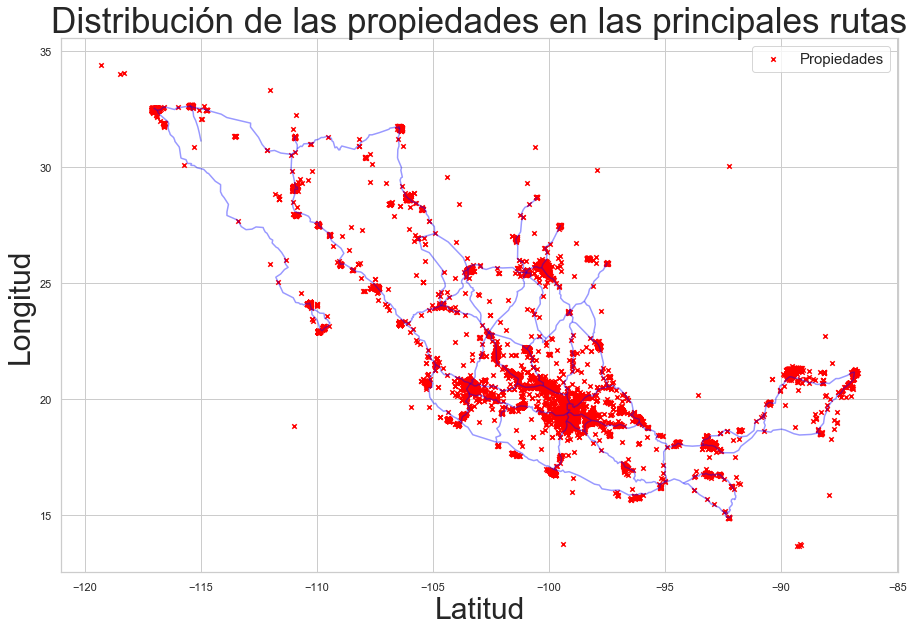

In [14]:
fig, ax = plt.subplots(figsize = (15,15))
mapa.plot(ax = ax, alpha = 0.4, color="blue")
geo_df.plot(ax = ax, markersize = 20, color = "red", marker = "x", label = "Propiedades")
plt.legend(prop={'size': 15})
ax.set_title(u"Distribución de las propiedades en las principales rutas", fontsize=35)
ax.set_xlabel(u"Latitud",fontsize=30)
ax.set_ylabel(u"Longitud", fontsize=30)

Text(0,0.5,u'Precio')

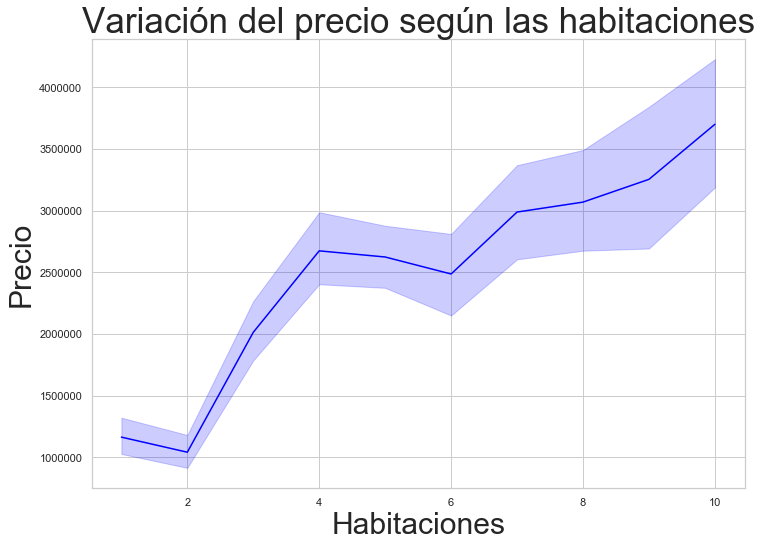

In [15]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
eventsASD = datos_principales.groupby(['provincia','habitaciones']).mean()[['precio']].reset_index()
sns.lineplot(x="habitaciones", y="precio", data=eventsASD, color='blue')
ax = plt.gca()
ax.set_title(u"Variación del precio según las habitaciones", fontsize=35)
ax.set_xlabel(u"Habitaciones",fontsize=30)
ax.set_ylabel(u"Precio", fontsize=30)

In [16]:
datos_principales['antiguedad_agrupada'] = '0'
datos_principales.loc[datos_principales.antiguedad <= 5, 'antiguedad_agrupada'] = '0'
datos_principales.loc[((datos_principales.antiguedad > 5) & (datos_principales.antiguedad <= 15)), 'antiguedad_agrupada'] = '10'
datos_principales.loc[((datos_principales.antiguedad > 15) & (datos_principales.antiguedad <= 25)), 'antiguedad_agrupada'] = '20'
datos_principales.loc[((datos_principales.antiguedad > 25) & (datos_principales.antiguedad <= 35)), 'antiguedad_agrupada'] = '30'
datos_principales.loc[((datos_principales.antiguedad > 35) & (datos_principales.antiguedad <= 45)), 'antiguedad_agrupada'] = '40'
datos_principales.loc[((datos_principales.antiguedad > 45) & (datos_principales.antiguedad <= 55)), 'antiguedad_agrupada'] = '50'
datos_principales.loc[((datos_principales.antiguedad > 55) & (datos_principales.antiguedad <= 65)), 'antiguedad_agrupada'] = '60'
datos_principales.loc[((datos_principales.antiguedad > 65) & (datos_principales.antiguedad <= 75)), 'antiguedad_agrupada'] = '70'
datos_principales.loc[((datos_principales.antiguedad > 75) & (datos_principales.antiguedad <= 85)), 'antiguedad_agrupada'] = '80'
datos_principales.loc[((datos_principales.antiguedad > 85) & (datos_principales.antiguedad <= 95)), 'antiguedad_agrupada'] = '90'
datos_principales.loc[datos_principales.antiguedad > 95, 'antiguedad_agrupada'] = '100'

Text(81.8,0.5,u'Habitaciones')

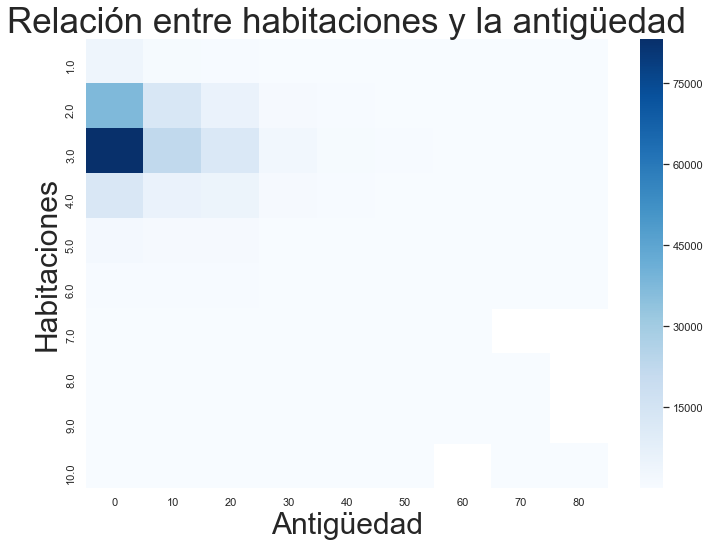

In [17]:
df_heat = datos_principales.groupby(["habitaciones", "antiguedad_agrupada"])["id"].size().reset_index()
df_heat['antiguedad_agrupada'] = pd.Categorical(df_heat['antiguedad_agrupada'], categories=['0','10','20','30','40','50', '60', '70', '80'])
df_heat.index = pd.CategoricalIndex(df_heat.index, categories= ['0','10','20','30','40','50', '60', '70', '80'])
df_heat.sortlevel(level=0, inplace=True)
for_heatmap = df_heat.pivot_table(index='habitaciones', columns='antiguedad_agrupada', values='id', aggfunc='sum')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g = sns.heatmap(for_heatmap,  cmap="Blues")
g.set_title(u"Relación entre habitaciones y la antigüedad", fontsize=35)
g.set_xlabel(u"Antigüedad",fontsize=30)
g.set_ylabel(u"Habitaciones", fontsize=30)

In [18]:
datos_principales.loc[datos_principales.tipodepropiedad.str.contains('Comercial', na=False), 'tipodepropiedad'] = 'Comercio'
datos_principales.loc[datos_principales.tipodepropiedad.str.contains('Casa en condominio', na=False), 'tipodepropiedad'] = 'Condominio'
zona = datos_principales.loc[(datos_principales['tipodepropiedad'] == 'Casa') | (datos_principales['tipodepropiedad'] == 'Apartamento') | (datos_principales['tipodepropiedad'] == 'Condominio')]
zona = zona.loc[zona['habitaciones'] < 6]

Text(81.8,0.5,u'Habitaciones')

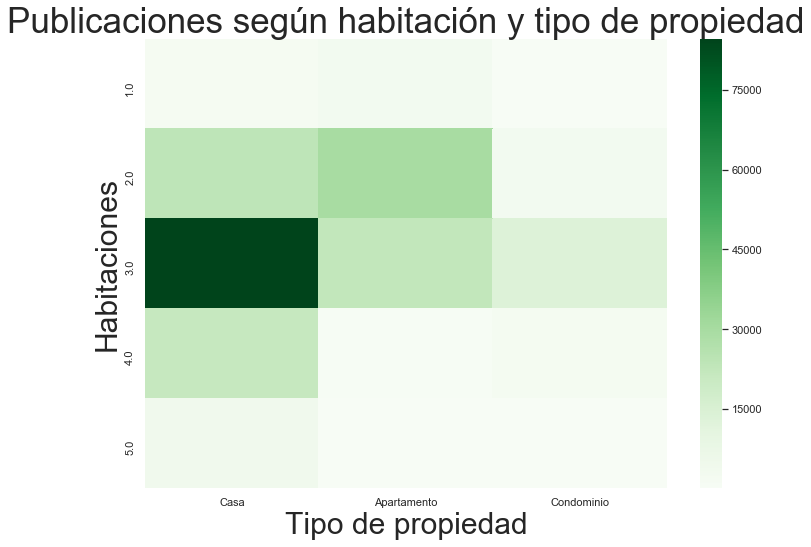

In [19]:
df_heat = zona.groupby(["habitaciones", "tipodepropiedad"])["id"].size().reset_index()
df_heat['tipodepropiedad'] = pd.Categorical(df_heat['tipodepropiedad'], categories=['Casa','Apartamento','Condominio','Terreno','Comercio'])
df_heat.index = pd.CategoricalIndex(df_heat.index, categories= ['Casa','Apartamento','Condominio','Terreno','Comercio'])
df_heat.sortlevel(level=0, inplace=True)
for_heatmap = df_heat.pivot_table(index='habitaciones', columns='tipodepropiedad', values='id', aggfunc='sum')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g = sns.heatmap(for_heatmap,  cmap="Greens")
g.set_title(u"Publicaciones según habitación y tipo de propiedad", fontsize=35)
g.set_xlabel(u"Tipo de propiedad",fontsize=30)
g.set_ylabel(u"Habitaciones", fontsize=30)

In [20]:
datos_principales['fecha'] = pd.to_datetime(datos_principales['fecha'], infer_datetime_format=True)
datos_principales['mes'] = datos_principales['fecha'].dt.month
datos_principales['dia'] = datos_principales['fecha'].dt.dayofweek
datos_principales['anio'] = datos_principales['fecha'].dt.year
datos_principales['anio_nombre'] = '2010'
datos_principales.loc[datos_principales.anio == 2012, 'anio_nombre'] = '2012'
datos_principales.loc[datos_principales.anio == 2013, 'anio_nombre'] = '2013'
datos_principales.loc[datos_principales.anio == 2014, 'anio_nombre'] = '2014'
datos_principales.loc[datos_principales.anio == 2015, 'anio_nombre'] = '2015'
datos_principales.loc[datos_principales.anio == 2016, 'anio_nombre'] = '2016'

Text(0,0.5,u'Precio')

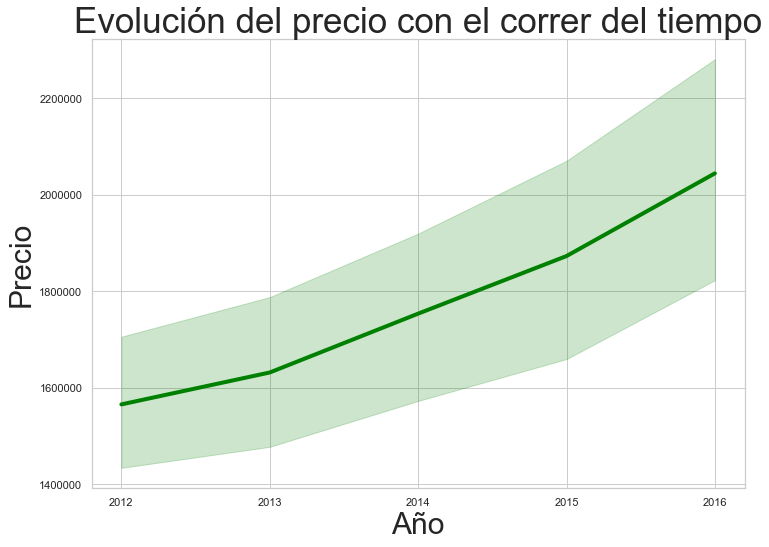

In [21]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
eventsASD = datos_principales.groupby(['provincia','anio_nombre']).mean()[['precio']].reset_index()
sns.lineplot(x="anio_nombre", y="precio", data=eventsASD, color='green')
ax = plt.gca()
ax.lines[0].set_linestyle("-")
ax.lines[0].set_linewidth(4)
ax.set_title(u"Evolución del precio con el correr del tiempo", fontsize=35)
ax.set_xlabel(u"Año",fontsize=30)
ax.set_ylabel(u"Precio", fontsize=30)

Text(0,0.5,u'Precio')

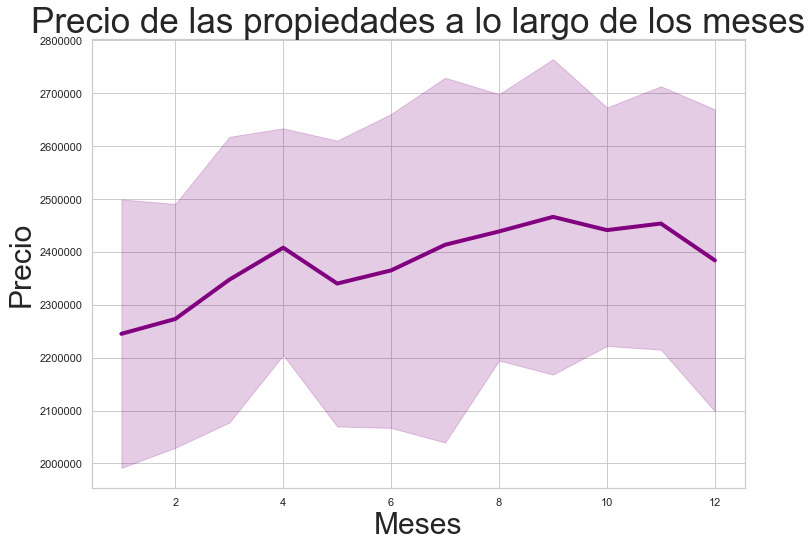

In [22]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
eventsASD = datos_principales.groupby(['anio','mes']).mean()[['precio']].reset_index()
sns.lineplot(x="mes", y="precio", data=eventsASD, markers=True, dashes=False, color='purple')
ax = plt.gca()
ax.lines[0].set_linestyle("-")
ax.lines[0].set_linewidth(4)
ax.set_title(u"Precio de las propiedades a lo largo de los meses", fontsize=35)
ax.set_xlabel(u"Meses",fontsize=30)
ax.set_ylabel(u"Precio", fontsize=30)

In [23]:
datos_principales['dia_nombre'] = 'LUN'
datos_principales.loc[datos_principales.dia == 0, 'dia_nombre'] = 'DOM'
datos_principales.loc[datos_principales.dia == 1, 'dia_nombre'] = 'LUN'
datos_principales.loc[datos_principales.dia == 2, 'dia_nombre'] = 'MAR'
datos_principales.loc[datos_principales.dia == 3, 'dia_nombre'] = 'MIE'
datos_principales.loc[datos_principales.dia == 4, 'dia_nombre'] = 'JUE'
datos_principales.loc[datos_principales.dia == 5, 'dia_nombre'] = 'VIE'
datos_principales.loc[datos_principales.dia == 6, 'dia_nombre'] = 'SAB'
datos_principales['dia_nombre'] = pd.Categorical(datos_principales['dia_nombre'], categories=['LUN','MAR','MIE','JUE','VIE','SAB', 'DOM'])

Text(0,0.5,u'Precio')

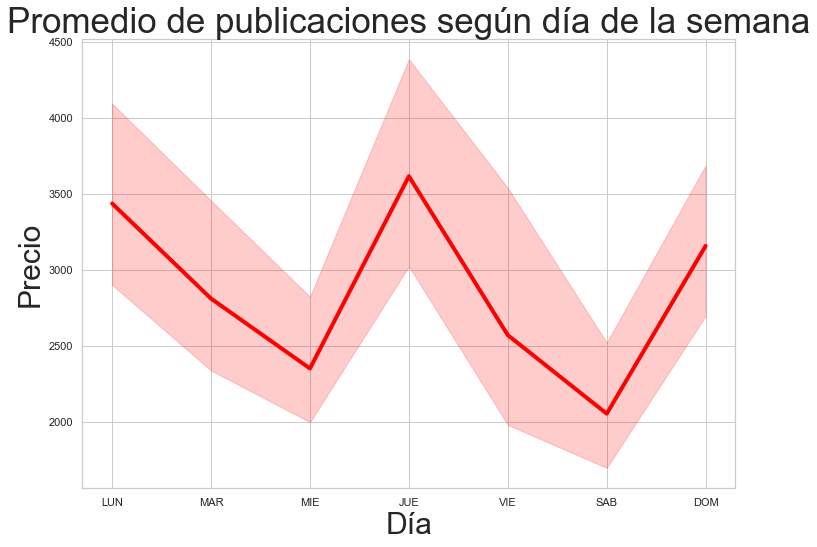

In [24]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
eventsASD = datos_principales.groupby(['mes','dia_nombre']).count()[['id']].reset_index()
sns.lineplot(x="dia_nombre", y="id", data=eventsASD, color='red')
ax = plt.gca()
ax.lines[0].set_linestyle("-")
ax.lines[0].set_linewidth(4)
ax.set_title(u"Promedio de publicaciones según día de la semana", fontsize=35)
ax.set_xlabel(u"Día",fontsize=30)
ax.set_ylabel(u"Precio", fontsize=30)

In [25]:
habitaciones = datos_principales.loc[datos_principales['habitaciones'] < 5]
df1 = habitaciones[['habitaciones','precio','anio']]
df1['anio_nombre'] = '2010'
df1.loc[df1.anio == 2012, 'anio_nombre'] = '2012'
df1.loc[df1.anio == 2013, 'anio_nombre'] = '2013'
df1.loc[df1.anio == 2014, 'anio_nombre'] = '2014'
df1.loc[df1.anio == 2015, 'anio_nombre'] = '2015'
df1.loc[df1.anio == 2016, 'anio_nombre'] = '2016'

Text(0,0.5,u'Precio')

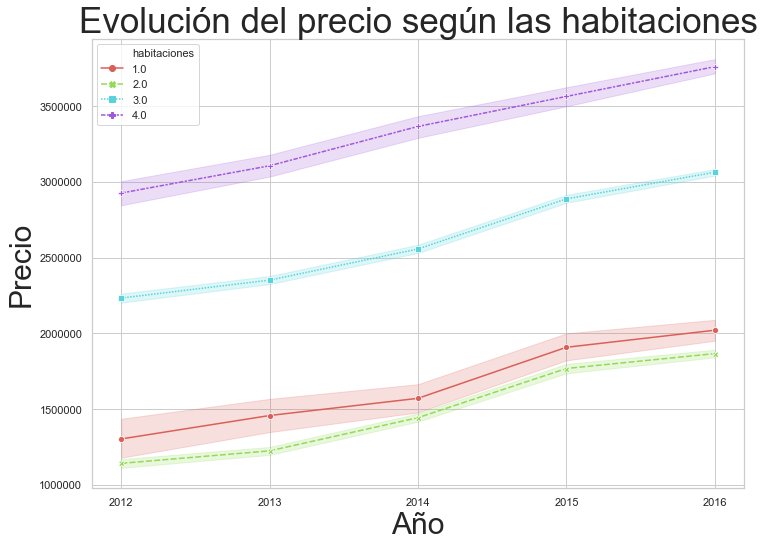

In [26]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) 
sns.lineplot(x="anio_nombre", y="precio", 
hue="habitaciones", style="habitaciones", markers=True, data=df1, 
palette=sns.color_palette("hls", len(df1['habitaciones'].unique())));
ax = plt.gca()
ax.set_title(u"Evolución del precio según las habitaciones", fontsize=35)
ax.set_xlabel(u"Año",fontsize=30)
ax.set_ylabel(u"Precio", fontsize=30)

In [27]:
df2 = datos_principales[['ciudad','precio','anio_nombre']]
asdasd = df2.loc[(df2["ciudad"] == 'Querétaro') | (df2["ciudad"] == 'Benito Juárez') | (df2["ciudad"] == 'Zapopan') | (df2["ciudad"] == 'San Luis Potosí') | (df2["ciudad"] == 'Mérida'),:]
asdasd.loc[asdasd.ciudad.str.contains('Querétaro', na=False), 'ciudad'] = 'Queretaro'
asdasd.loc[asdasd.ciudad.str.contains('Benito Juárez', na=False), 'ciudad'] = 'Benito Juarez'
asdasd.loc[asdasd.ciudad.str.contains('San Luis Potosí', na=False), 'ciudad'] = 'San Luis Potosi'
asdasd.loc[asdasd.ciudad.str.contains('Mérida', na=False), 'ciudad'] = 'Merida'

Text(0,0.5,u'Precio')

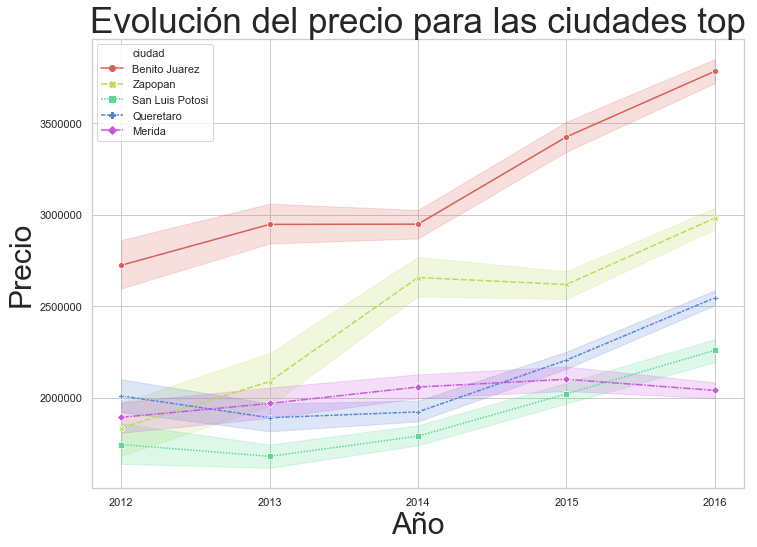

In [28]:
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) 
sns.lineplot(x="anio_nombre", y="precio", 
hue="ciudad", style="ciudad", markers=True, data=asdasd, 
palette=sns.color_palette("hls", len(asdasd['ciudad'].unique())));
ax = plt.gca()
ax.set_title(u"Evolución del precio para las ciudades top", fontsize=35)
ax.set_xlabel(u"Año",fontsize=30)
ax.set_ylabel(u"Precio", fontsize=30)

Text(26.79,0.5,u'Cantidad')

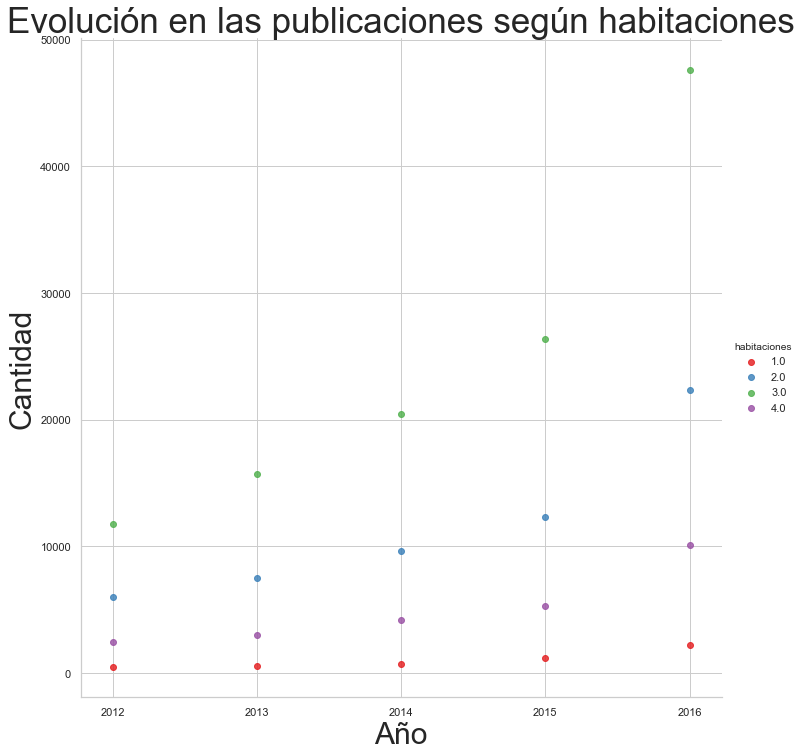

In [29]:
crecimiento_eventos = df1.groupby(['habitaciones','anio_nombre']).count()[['precio']].reset_index()
sns.lmplot(x='anio_nombre', y='precio', hue='habitaciones', data=crecimiento_eventos, fit_reg=False, size=10, palette="Set1")
ax = plt.gca()
ax.set_title(u"Evolución en las publicaciones según habitaciones", fontsize=35)
ax.set_xlabel(u"Año",fontsize=30)
ax.set_ylabel(u"Cantidad", fontsize=30)

Text(30.2812,0.5,u'Cantidad')

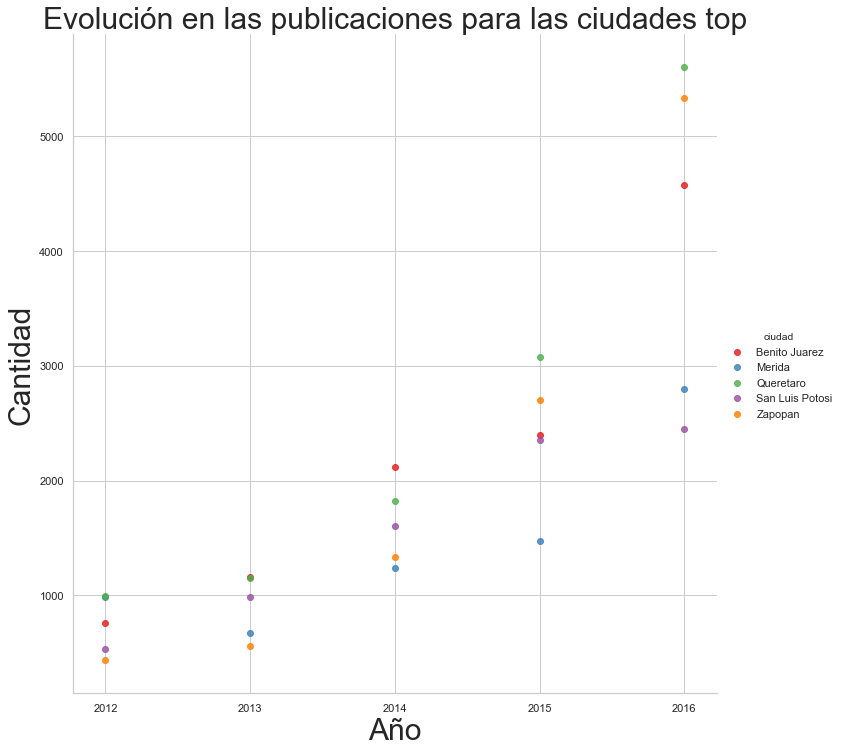

In [30]:
crecimiento_eventos = asdasd.groupby(['ciudad','anio_nombre']).count()[['precio']].reset_index()
sns.lmplot(x='anio_nombre', y='precio', hue='ciudad', data=crecimiento_eventos, fit_reg=False, size=10, palette="Set1")
ax = plt.gca()
ax.set_title(u"Evolución en las publicaciones para las ciudades top", fontsize=30)
ax.set_xlabel(u"Año",fontsize=30)
ax.set_ylabel(u"Cantidad", fontsize=30)